# 🍷 The Architect of Flavor: Deciphering Red Wine Quality through Data

## A Comprehensive Exploratory Data Analysis (EDA) on the Portuguese "Vinho Verde" Red Wine

**Mission Briefing:** In the world of fine wines, quality is often perceived as subjective. However, behind every great vintage lies a complex chemical balance. Our goal today is to act as **Data Sommeliers**. We will use the famous Red Wine Quality dataset (Cortez et al., 2009) to uncover the hidden relationships between chemical properties—like acidity, sugar, and alcohol—and the final quality rating given by experts.

---

## 🍇 Phase 1: Entering the Vineyard (Environment Setup)

Before we can analyze the vintage, we must prepare our laboratory. We will use `Pandas` for data handling, `Matplotlib` and `Seaborn` for classic visualizations, and `Plotly` for interactive exploration.

```mermaid
graph LR
A[Raw CSV] --> B{Data Scientist}
B --> C[Visual Insights]
B --> D[Chemical Correlation]
D --> E[Quality Prediction]
```

In [1]:
import numpy as np
import pandas as pd
import os

## Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Check for available files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


## 🍾 Phase 2: Uncorking the Data (Acquisition)

We ingest the dataset into a DataFrame. This specific dataset contains 1,599 observations of red wine variants, each with 11 chemical features and one quality target.

In [2]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

## 🍷 Phase 3: The First Pour (Initial Inspection)

A true expert always observes the wine's appearance first. We check the top rows to see the standard range of values and the overall structure of our data.

> [!TIP]
> Features like `fixed acidity`, `volatile acidity`, and `citric acid` represent the wine's structure, while `alcohol` and `residual sugar` affect body and taste.

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Verifying Data Integrity

We must ensure our evidence is consistent. We check the end of the file and the general metadata to confirm data types and handle potential duplicates.

In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 📈 Phase 4: Measuring the Body (Statistical Summary)

Let's look at the mathematical profile of our wines. Understanding the mean, standard deviation, and quartiles allows us to identify what a "typical" red wine looks like in this dataset.

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Sanity Check: Missing Values & Duplicates

Even the finest wine can have sediment. We search for missing values and identify duplicate entries that might skew our analysis.

In [7]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Entries Count:", df.duplicated().sum())

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Duplicate Entries Count: 240


> [!NOTE]
> While some duplicates might be real repeat samples, we will remove them to ensure our model (if developed later) generalizes well.

In [8]:
df = df.drop_duplicates()
print("Duplicates remaining:", df.duplicated().sum())

Duplicates remaining: 0


## 📊 Phase 5: The Visual Tasting (EDA)

### Target Analysis: Quality Distribution

What is the distribution of wine quality? Are most wines average, or do we have many exceptional vintages?

*Action: Plotting the frequency of each quality score.*

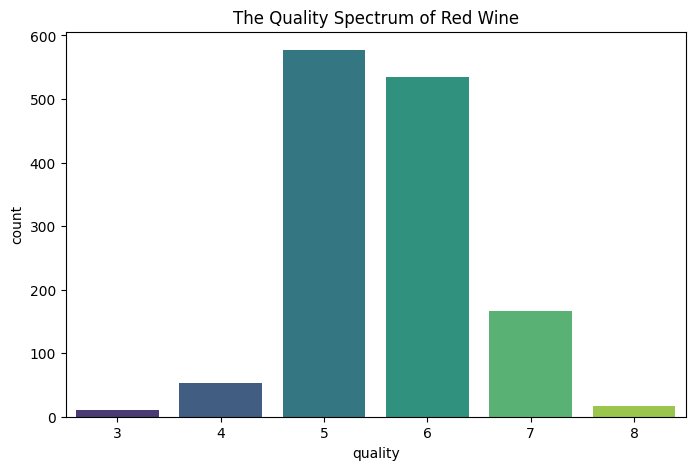

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title("The Quality Spectrum of Red Wine")
plt.show()

### The Alcohol Factor

Does a higher alcohol content correlate with higher perceived quality? Let's analyze the body of the wine across quality levels.

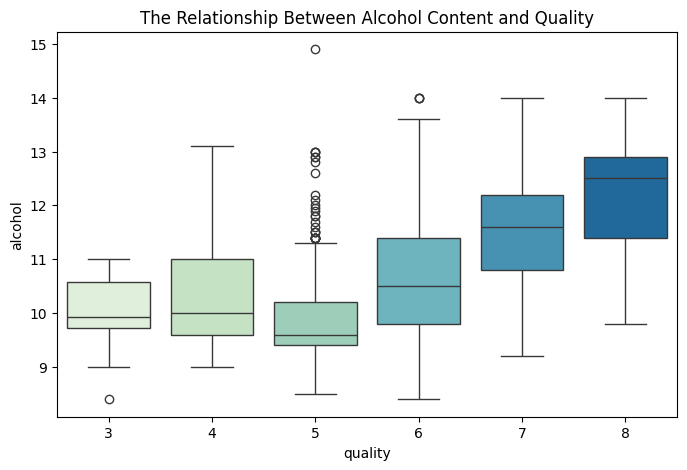

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='quality', y='alcohol', data=df, palette='GnBu')
plt.title("The Relationship Between Alcohol Content and Quality")
plt.show()

## 🧪 Phase 6: Refining the Blend (Feature Engineering)

To make our data more intuitive for high-level decision making, we categorize the wines into **Low**, **Medium**, and **High** quality labels.

| Label | Quality Range |
| :--- | :--- |
| High | > 6 |
| Medium | 6 |
| Low | <= 5 |

In [11]:
df['quality_label'] = df['quality'].apply(
    lambda x: 'Low' if x <= 5 else 'Medium' if x == 6 else 'High'
)

### Visualizing Categories

Let's see how our new categories interact with alcohol content.

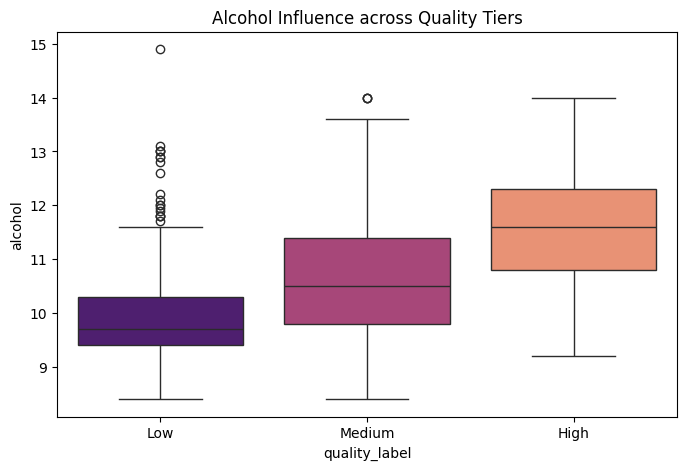

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='quality_label', y='alcohol', data=df, order=['Low', 'Medium', 'High'], palette='magma')
plt.title("Alcohol Influence across Quality Tiers")
plt.show()

--- 

# 🏁 Conclusion: The Final Inspection Report

Our investigation into the chemistry of red wine reveals several critical insights:
- 📈 **Alcohol as a Lead Descriptor:** There is a clear upward trend where higher-quality wines often boast a higher alcohol volume.
- ⚖️ **Balance is Key:** While we've only scratched the surface, the data suggests that quality isn't about one single ingredient, but the balance of acidity and structure.
- 🏛️ **Foundation for ML:** This cleaned and categorized dataset is now perfectly primed for predictive modeling to automate quality assessment.

**Case Closed.**

---

## 👤 Lead Data Sommelier

**Author:** Tassawar Abbas  
**Email:** abbas829@gmail.com  
**License:** Creative Commons Metadata